# Implement PCA from scratch and check the results on eigenfaces data

In [1]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None

    def fit(self, X):
        X_centered = X - np.mean(X, axis=0)
        cov_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        eigenvectors = eigenvectors[:, eigenvalues.argsort()[::-1]]
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        X_centered = X - np.mean(X, axis=0)
        transformed_data = np.dot(X_centered, self.components)
        return transformed_data

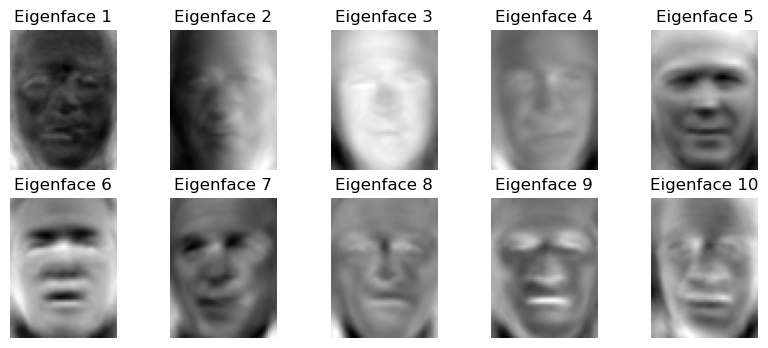

In [3]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=70)
X = lfw_dataset.data

pca = PCA(n_components=100)
pca.fit(X)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    eigenface = pca.components[:, i].reshape((62, 47)).real
    ax.imshow(-eigenface, cmap='gray')
    ax.set_title('Eigenface {}'.format(i+1))
    ax.axis('off')
plt.show()


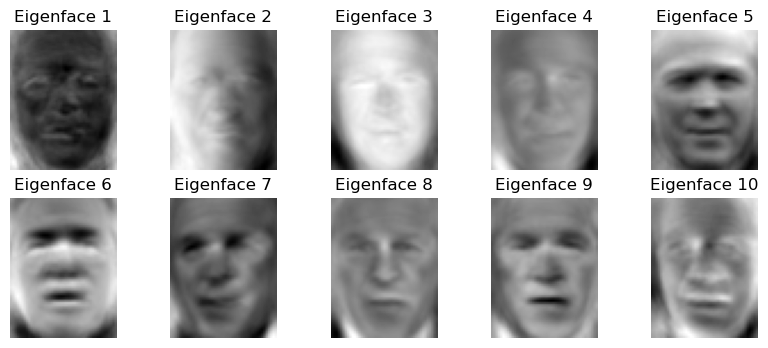

In [4]:
from sklearn.decomposition import PCA

# load the LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=70)
X = lfw_dataset.data

# perform PCA on the dataset
pca = PCA(n_components=100)
pca.fit(X)

# plot the first 10 eigenfaces
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape((62, 47)), cmap='gray')
    ax.set_title('Eigenface {}'.format(i+1))
    ax.axis('off')
plt.show()